In [1]:
import math
from math import sqrt

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import pathlib
import tikzplotlib
from collections import defaultdict


In [3]:
print(tikzplotlib.Flavors.latex.preamble())

\documentclass{standalone}
\usepackage[utf8]{inputenc}
\usepackage{pgfplots}
\DeclareUnicodeCharacter{2212}{−}
\usepgfplotslibrary{groupplots,dateplot}
\usetikzlibrary{patterns,shapes.arrows}
\pgfplotsset{compat=newest}



In [4]:
# mpl.use("pgf")
# mpl.rcParams.update({
    # "pgf.texsystem": "pdflatex",
    # 'font.family': 'serif',
    # 'text.usetex': True,
    # 'pgf.rcfonts': False,
# })

In [3]:
def read_jsons():

    data = []
    # Read jsons files of build/semana03/circles with pathlib
    jsons = list(pathlib.Path("../build/semana06/experiments/").glob("*.json"))
    jsons.sort()
    print(jsons)
    
    for json_file in jsons:
        with open(json_file, "r") as f:
            json_values = json.load(f)
            data.append(json_values)


    return pd.DataFrame(data)



In [7]:
df = read_jsons()
default_palette = sns.color_palette("Dark2")


hue_categories = df.container.unique()  
hue_colors = {category: color for category, color in zip(hue_categories, default_palette)}


[PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_1000000_1.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_1000000_2.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_1000000_3.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_1000000_4.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_1000000_5.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_100000_1.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_100000_2.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_100000_3.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_100000_4.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_100000_5.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_10000_1.json'), PosixPath('../build/semana06/experiments/random_b

In [12]:
df = read_jsons()

[PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_1000000_1.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_1000000_2.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_1000000_3.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_1000000_4.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_1000000_5.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_100000_1.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_100000_2.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_100000_3.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_100000_4.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_100000_5.json'), PosixPath('../build/semana06/experiments/random_binary_tree_0.1_0.01_10000_1.json'), PosixPath('../build/semana06/experiments/random_b

In [13]:
df

,n,time,container,length,length_std,segments,intersections
0,1000000,0.527828,binary_tree,0.1,0.1,NaN,NaN
1,1000000,0.534454,binary_tree,0.1,0.1,NaN,NaN
2,1000000,0.532882,binary_tree,0.1,0.1,NaN,NaN
3,1000000,0.530638,binary_tree,0.1,0.1,NaN,NaN
4,1000000,0.539003,binary_tree,0.1,0.1,NaN,NaN
...,...,...,...,...,...,...,...
85,10,0.000011,unordered_list,0.1,0.1,"[[0.000481502346, 0.580234509, 0.0924431209, 0...","[[5, 2]]"
86,10,0.000012,unordered_list,0.1,0.1,"[[0.530771961, 0.465493364, 0.730218661, 0.378...",[]
87,10,0.000010,unordered_list,0.1,0.1,"[[0.380261133, 0.655655567, 0.504672508, 0.958...","[[5, 1]]"
88,10,0.000010,unordered_list,0.1,0.1,"[[0.653163723, 0.635836523, 0.716835815, 0.768...",[]


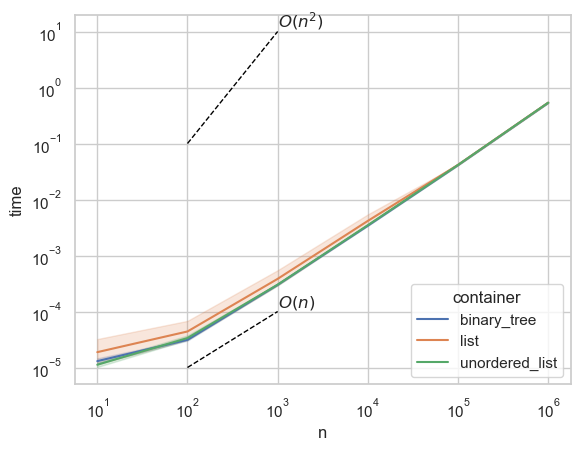

In [15]:
fig, ax = plt.subplots(1, 1)
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="n", y="time", ax=ax, hue="container") #, palette=hue_colors)

ax.set(xscale="log", yscale="log")

xs = [100, 1000]; ys = [1e-1, 1e+1]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")


xs = [100, 1000]; ys = [1e-5, 1e-4]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom")

xs = [math.pow(10, i) for i in range(1, 7)]
ys = [x*math.log(x)/10000000 for x in xs]
# ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
# ax.text(xs[-1], ys[-1], "$O(nlog(n))$", fontsize=12, verticalalignment="bottom")
plt.show()